## Lab 3. MẠNG NEURAL TÍCH CHẬP (CNN)

MSSV: 20521196

Họ tên: Nguyễn Mạnh Đức

Lớp: DS201.N11.1


## 2. Chuẩn bị dữ liệu

In [37]:
from keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train,
test_size=0.1)

In [39]:
import numpy as np 
X_train_expanded = np.expand_dims(X_train, axis=3)
X_dev_expanded = np.expand_dims(X_dev, axis=3)
X_test_expanded = np.expand_dims(X_test, axis=3)

In [40]:
from keras.utils import to_categorical
y_train_new = to_categorical(y_train, num_classes=10)
y_dev_new = to_categorical(y_dev, num_classes=10)


## 3. Xây dựng mô hình mạng neural tích chập

In [41]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy


model_3 = Sequential()
model_3.add(Input(shape=(28, 28, 1)))
model_3.add(Conv2D(32, padding="valid", kernel_size=(3, 3),
activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(10, activation="softmax"))

In [42]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 1600)              0         
                                                                 
 dense_16 (Dense)            (None, 10)               

In [43]:
optimizer = Adam(learning_rate=0.01)
loss = CategoricalCrossentropy()
model_3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [44]:
history_3 = model_3.fit(X_train_expanded, y_train_new,
batch_size=128, epochs=30,
validation_data=(X_dev_expanded,y_dev_new))


Epoch 1/30
422/422 [==============================] - 3s 6ms/step - loss: 1.0507 - accuracy: 0.9135 - val_loss: 0.1358 - val_accuracy: 0.9573
Epoch 2/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1255 - accuracy: 0.9629 - val_loss: 0.1420 - val_accuracy: 0.9565
Epoch 3/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1192 - accuracy: 0.9649 - val_loss: 0.1758 - val_accuracy: 0.9528
Epoch 4/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1193 - accuracy: 0.9658 - val_loss: 0.1219 - val_accuracy: 0.9678
Epoch 5/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1261 - accuracy: 0.9644 - val_loss: 0.1137 - val_accuracy: 0.9663
Epoch 6/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1090 - accuracy: 0.9686 - val_loss: 0.1185 - val_accuracy: 0.9677
Epoch 7/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1227 - accuracy: 0.9659 - val_loss: 0.1139 - val_accuracy: 0.9680
Epoch 

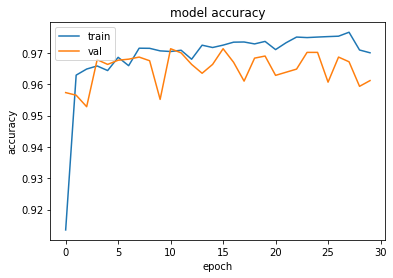

In [45]:
import matplotlib.pyplot as plt
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

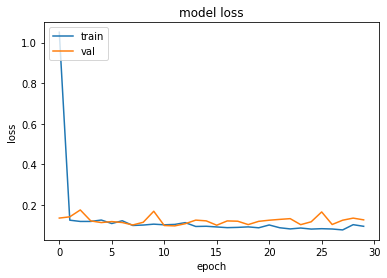

In [46]:
import matplotlib.pyplot as plt
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [47]:
y_pred_3 = model_3.predict(X_test_expanded)
y_pred_3 = np.argmax(y_pred_3 , axis = -1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_3)*100

313/313 [==============================] - 1s 2ms/step


96.23

## 4. Xây dựng mạng LeNet-5


In [48]:
from keras.layers import AveragePooling2D

model_4 = Sequential()
model_4.add(Conv2D(filters=6, kernel_size=(5,5), padding='same',
activation='relu',input_shape=(28,28,1)))
model_4.add(AveragePooling2D(strides=2, pool_size=(2, 2)))
model_4.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid',
activation='relu'))
model_4.add(AveragePooling2D(strides=2, pool_size=(2, 2)))
model_4.add(Flatten())
model_4.add(Dense(120, activation='relu'))
model_4.add(Dense(84, activation='relu'))
model_4.add(Dense(10, activation='softmax'))


In [49]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_8 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_9 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_9 (Flatten)         (None, 400)               0         
                                                                 
 dense_17 (Dense)            (None, 120)              

In [50]:
optimizer = Adam(learning_rate=5e-4)
loss = CategoricalCrossentropy()
model_4.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history_4 = model_4.fit(X_train_expanded, y_train_new,
batch_size=128, epochs=30,
validation_data=(X_dev_expanded,y_dev_new))


Epoch 1/30
422/422 [==============================] - 2s 5ms/step - loss: 0.6982 - accuracy: 0.8797 - val_loss: 0.1639 - val_accuracy: 0.9505
Epoch 2/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1198 - accuracy: 0.9651 - val_loss: 0.1009 - val_accuracy: 0.9722
Epoch 3/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0775 - accuracy: 0.9765 - val_loss: 0.0842 - val_accuracy: 0.9742
Epoch 4/30
422/422 [==============================] - 2s 5ms/step - loss: 0.0575 - accuracy: 0.9826 - val_loss: 0.0686 - val_accuracy: 0.9808
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0690 - val_accuracy: 0.9802
Epoch 6/30
422/422 [==============================] - 2s 4ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0693 - val_accuracy: 0.9815
Epoch 7/30
422/422 [==============================] - 2s 5ms/step - loss: 0.0334 - accuracy: 0.9895 - val_loss: 0.0575 - val_accuracy: 0.9852
Epoch 

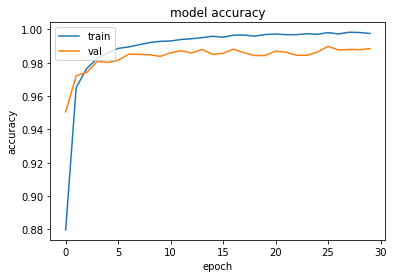

In [51]:
import matplotlib.pyplot as plt
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

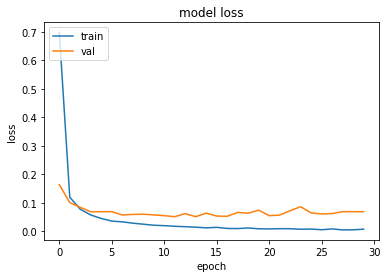

In [52]:
import matplotlib.pyplot as plt
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [53]:
y_pred_4 = model_4.predict(X_test_expanded)
y_pred_4 = np.argmax(y_pred_4 , axis = -1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_4)*100

313/313 [==============================] - 1s 2ms/step


98.85000000000001

## 5. Ví dụ áp dụng: Xây dựng mạng AlexNet

In [54]:
model_5 = Sequential()
model_5.add(Conv2D(filters = 96, kernel_size=(11,11), input_shape = (28,28,1), 
                  padding = 'same', strides =(4,4), activation = 'relu' ))
model_5.add(MaxPooling2D(pool_size = (3,3),padding='same', strides =(2,2)))
model_5.add(Conv2D(filters = 256, kernel_size=(5,5), strides =(1,1), activation = 'relu', 
                  padding='same'))
model_5.add(MaxPooling2D(pool_size = (3,3),padding='same', strides = (2,2)))
model_5.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  strides =( 1,1), activation = 'relu'))
model_5.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', 
                  strides =( 1,1),  activation = 'relu'))
model_5.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', 
                  strides =( 1,1),  activation = 'relu'))
model_5.add(MaxPooling2D(pool_size = (3,3),padding='same', strides =(2,2)))
model_5.add(Flatten())
model_5.add(Dense(4096, activation='relu'))
model_5.add(Dense(4096, activation='relu'))
model_5.add(Dense(10, activation='softmax'))
model_5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 7, 7, 96)          11712     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 2, 2, 384)         885120    
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2, 384)       

In [56]:
from keras import callbacks
from keras.callbacks import EarlyStopping

optimizer = Adam(learning_rate = 5e-4)
loss = CategoricalCrossentropy()
model_5.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
callback = EarlyStopping(monitor= 'val_loss', patience=1)

history_5 = model_5.fit(X_train_expanded, y_train_new,
                    batch_size=256, epochs=30,
                  validation_data=(X_dev_expanded,y_dev_new), callbacks= callback)

Epoch 1/30
211/211 [==============================] - 7s 31ms/step - loss: 0.0782 - accuracy: 0.9794 - val_loss: 0.0822 - val_accuracy: 0.9792
Epoch 2/30
211/211 [==============================] - 6s 29ms/step - loss: 0.0483 - accuracy: 0.9863 - val_loss: 0.0926 - val_accuracy: 0.9740


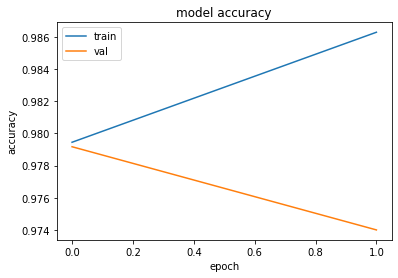

In [57]:
import matplotlib.pyplot as plt
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

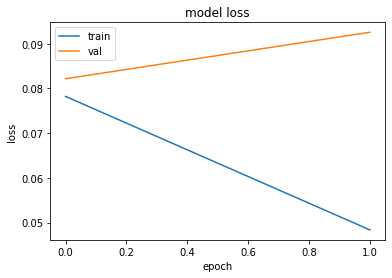

In [58]:
import matplotlib.pyplot as plt
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [59]:
y_pred_5 = model_5.predict(X_test_expanded)
y_pred_5 = np.argmax(y_pred_5 , axis = -1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_5)*100

313/313 [==============================] - 1s 3ms/step


97.68

## BÀI TẬP

### Bài tập 1

In [60]:
model_bt1 = Sequential()
model_bt1.add(Input(shape=(28, 28, 1)))
model_bt1.add(Conv2D(32, padding="valid", kernel_size=(3, 3),
activation="relu"))
model_bt1.add(MaxPooling2D(pool_size=(2, 2)))
model_bt1.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model_bt1.add(MaxPooling2D(pool_size=(2, 2)))
model_bt1.add(Flatten())
model_bt1.add(Dense(10, activation="softmax"))

optimizer = Adam(learning_rate=0.01)
loss = CategoricalCrossentropy()
model_bt1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history_bt1 = model_bt1.fit(X_train_expanded, y_train_new,
batch_size=128, epochs=30,
validation_data=(X_dev_expanded,y_dev_new))


Epoch 1/30
422/422 [==============================] - 3s 7ms/step - loss: 1.5993 - accuracy: 0.9020 - val_loss: 0.1456 - val_accuracy: 0.9572
Epoch 2/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1162 - accuracy: 0.9636 - val_loss: 0.1329 - val_accuracy: 0.9568
Epoch 3/30
422/422 [==============================] - 2s 5ms/step - loss: 0.1071 - accuracy: 0.9675 - val_loss: 0.1170 - val_accuracy: 0.9667
Epoch 4/30
422/422 [==============================] - 2s 5ms/step - loss: 0.0936 - accuracy: 0.9715 - val_loss: 0.1073 - val_accuracy: 0.9672
Epoch 5/30
422/422 [==============================] - 2s 5ms/step - loss: 0.0966 - accuracy: 0.9710 - val_loss: 0.0944 - val_accuracy: 0.9743
Epoch 6/30
422/422 [==============================] - 2s 5ms/step - loss: 0.0964 - accuracy: 0.9716 - val_loss: 0.1378 - val_accuracy: 0.9545
Epoch 7/30
422/422 [==============================] - 2s 5ms/step - loss: 0.0918 - accuracy: 0.9734 - val_loss: 0.1165 - val_accuracy: 0.9680
Epoch 

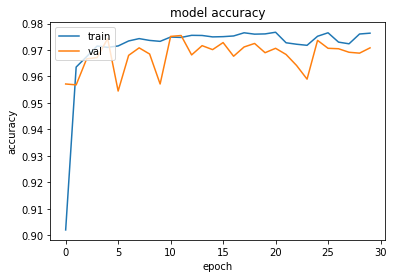

In [61]:
import matplotlib.pyplot as plt
plt.plot(history_bt1.history['accuracy'])
plt.plot(history_bt1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

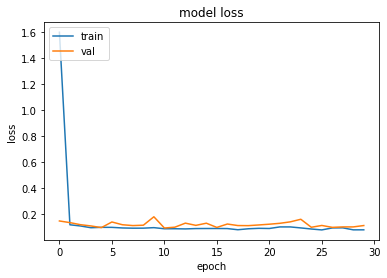

In [62]:
import matplotlib.pyplot as plt
plt.plot(history_bt1.history['loss'])
plt.plot(history_bt1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [63]:
y_pred_bt1 = model_bt1.predict(X_test_expanded)
y_pred_bt1 = np.argmax(y_pred_bt1 , axis = -1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_bt1)*100

313/313 [==============================] - 1s 3ms/step


97.3

### Bài tập 2

In [64]:
model_bt2 = Sequential()
model_bt2.add(Input(shape=(28, 28, 1)))
model_bt2.add(Conv2D(32, padding="valid", kernel_size=(3, 3),
activation="tanh"))
model_bt2.add(MaxPooling2D(pool_size=(2, 2)))
model_bt2.add(Conv2D(64, kernel_size=(3, 3), activation="tanh"))
model_bt2.add(MaxPooling2D(pool_size=(2, 2)))
model_bt2.add(Flatten())
model_bt2.add(Dense(10, activation="softmax"))

optimizer = Adam(learning_rate=0.01)
loss = CategoricalCrossentropy()
model_bt2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history_bt2 = model_bt2.fit(X_train_expanded, y_train_new,
batch_size=128, epochs=30,
validation_data=(X_dev_expanded,y_dev_new))


Epoch 1/30
422/422 [==============================] - 3s 6ms/step - loss: 0.2476 - accuracy: 0.9355 - val_loss: 0.1917 - val_accuracy: 0.9573
Epoch 2/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2168 - accuracy: 0.9599 - val_loss: 0.1885 - val_accuracy: 0.9655
Epoch 3/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2593 - accuracy: 0.9612 - val_loss: 0.2275 - val_accuracy: 0.9665
Epoch 4/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2867 - accuracy: 0.9609 - val_loss: 0.3229 - val_accuracy: 0.9577
Epoch 5/30
422/422 [==============================] - 2s 5ms/step - loss: 0.2882 - accuracy: 0.9647 - val_loss: 0.2674 - val_accuracy: 0.9678
Epoch 6/30
422/422 [==============================] - 2s 5ms/step - loss: 0.3018 - accuracy: 0.9648 - val_loss: 0.2816 - val_accuracy: 0.9692
Epoch 7/30
422/422 [==============================] - 3s 6ms/step - loss: 0.2965 - accuracy: 0.9669 - val_loss: 0.3189 - val_accuracy: 0.9640
Epoch 

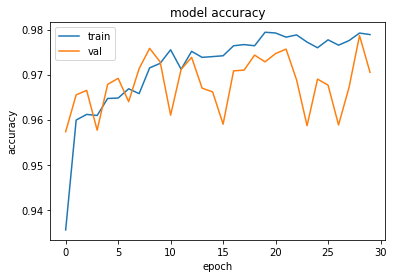

In [65]:
import matplotlib.pyplot as plt
plt.plot(history_bt2.history['accuracy'])
plt.plot(history_bt2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

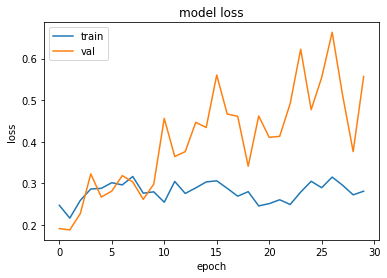

In [66]:
import matplotlib.pyplot as plt
plt.plot(history_bt2.history['loss'])
plt.plot(history_bt2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [67]:
y_pred_bt2 = model_bt2.predict(X_test_expanded)
y_pred_bt2 = np.argmax(y_pred_bt2 , axis = -1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_bt2)*100

313/313 [==============================] - 1s 2ms/step


97.46000000000001

### Bài tập 3

In [69]:
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D, AveragePooling2D, BatchNormalization, \
    ZeroPadding2D, Input, Dropout, MaxPooling2D

model_bt3 = Sequential()
model_bt3.add(Input(shape=(28, 28, 1)))
model_bt3.add(Conv2D(32, padding="valid", kernel_size=(3, 3),
activation="relu"))
model_bt3.add(MaxPooling2D(pool_size=(2, 2)))
model_bt3.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model_bt3.add(MaxPooling2D(pool_size=(2, 2)))
model_bt3.add(Flatten())
model_bt3.add(Dropout(0.5))
model_bt3.add(Dense(10, activation="softmax"))

print(model_bt3.summary())
optimizer = Adam(learning_rate=0.01)
loss = CategoricalCrossentropy()
model_bt3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history_bt3 = model_bt3.fit(X_train_expanded, y_train_new,
batch_size=128, epochs=30,
validation_data=(X_dev_expanded,y_dev_new))


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)            

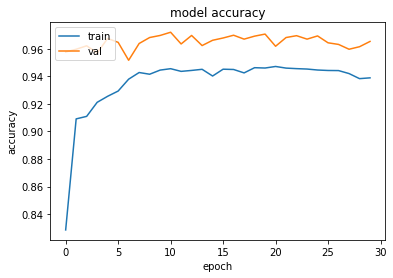

In [70]:
import matplotlib.pyplot as plt
plt.plot(history_bt3.history['accuracy'])
plt.plot(history_bt3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

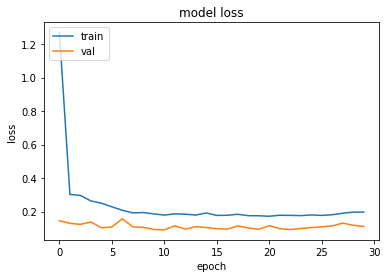

In [71]:
import matplotlib.pyplot as plt
plt.plot(history_bt3.history['loss'])
plt.plot(history_bt3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [72]:
y_pred_bt3 = model_bt3.predict(X_test_expanded)
y_pred_bt3 = np.argmax(y_pred_bt3 , axis = -1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_bt3)*100

313/313 [==============================] - 1s 3ms/step


96.66

In [74]:
model_bt3.save('model_bt3.h5')

## BÀI TẬP MỞ RỘNG 

### Bài tập 4*

In [75]:
model_bt4 = Sequential()
model_bt4.add(Input(shape = (28,28,1)))
model_bt4.add(Conv2D(96,(7,7), strides = (2,2),name = 'conv1'))
model_bt4.add(MaxPool2D(pool_size=(3, 3), strides=(2,2), padding='same', name='pool1'))
model_bt4.add(BatchNormalization(axis=3, name='bn_conv1'))
model_bt4.add(Conv2D(256, (5, 5), strides=(4, 4), name='conv2'))
model_bt4.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='pool2'))
model_bt4.add(BatchNormalization(axis=3, name='bn_conv2'))
model_bt4.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', name='conv3'))
model_bt4.add(Conv2D(1024, (3, 3), strides=(1, 1), padding='same', name='conv4'))
model_bt4.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', name='conv5'))
model_bt4.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='pool3'))
model_bt4.add(Flatten())
model_bt4.add(Dense(units=4096))
model_bt4.add(Dense(units=4096))
model_bt4.add(Dense(units=10, activation="softmax"))

print(model_bt4.summary())

optimizer = Adam(learning_rate = 5e-4)
loss = CategoricalCrossentropy()
model_bt4.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
callback = EarlyStopping(monitor= 'val_loss', patience=1)
history_bt4 = model_bt4.fit(X_train_expanded, y_train_new,
                    batch_size=256, epochs=30,
                  validation_data=(X_dev_expanded,y_dev_new), callbacks= callback)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 11, 11, 96)        4800      
                                                                 
 pool1 (MaxPooling2D)        (None, 6, 6, 96)          0         
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 6, 6, 96)         384       
 n)                                                              
                                                                 
 conv2 (Conv2D)              (None, 1, 1, 256)         614656    
                                                                 
 pool2 (MaxPooling2D)        (None, 1, 1, 256)         0         
                                                                 
 bn_conv2 (BatchNormalizatio  (None, 1, 1, 256)        1024      
 n)                                                  

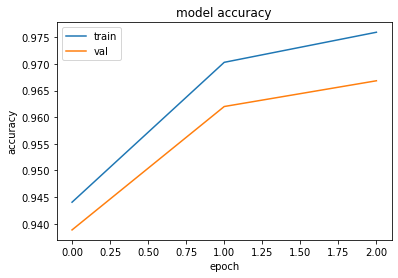

In [76]:
import matplotlib.pyplot as plt
plt.plot(history_bt4.history['accuracy'])
plt.plot(history_bt4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

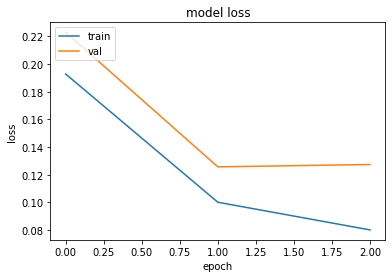

In [77]:
import matplotlib.pyplot as plt
plt.plot(history_bt4.history['loss'])
plt.plot(history_bt4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [78]:
y_pred_bt4 = model_bt4.predict(X_test_expanded)
y_pred_bt4 = np.argmax(y_pred_bt4 , axis = -1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_bt4)*100

313/313 [==============================] - 2s 6ms/step


96.59

### Bài tập 5* 


#### a)

In [79]:
from keras.datasets.fashion_mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train,
test_size=0.1)

X_train_expanded = np.expand_dims(X_train, axis=3)
X_dev_expanded = np.expand_dims(X_dev, axis=3)
X_test_expanded = np.expand_dims(X_test, axis=3)


y_train_new = to_categorical(y_train, num_classes=10)
y_dev_new = to_categorical(y_dev, num_classes = 10)

4422102/4422102 [==============================] - 0s 0us/step


In [80]:
model_bt5a = Sequential()
model_bt5a.add(Input(shape=(28, 28, 1)))
model_bt5a.add(Conv2D(32, padding="valid", kernel_size=(3, 3),
activation="relu"))
model_bt5a.add(MaxPooling2D(pool_size=(2, 2)))
model_bt5a.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model_bt5a.add(MaxPooling2D(pool_size=(2, 2)))
model_bt5a.add(Flatten())
model_bt5a.add(Dropout(0.5))
model_bt5a.add(Dense(10, activation="softmax"))
model_bt5a.summary()

optimizer = Adam(learning_rate = 0.01)
loss = CategoricalCrossentropy()
model_bt5a.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history_bt5a = model_bt5a.fit(X_train_expanded, y_train_new,
                    batch_size=128, epochs=30,
                  validation_data=(X_dev_expanded,y_dev_new))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)            

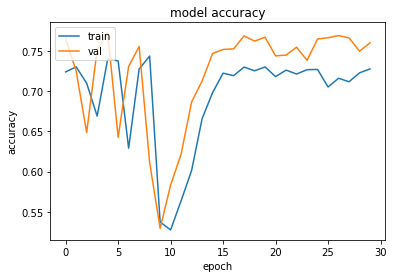

In [81]:
import matplotlib.pyplot as plt
plt.plot(history_bt5a.history['accuracy'])
plt.plot(history_bt5a.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

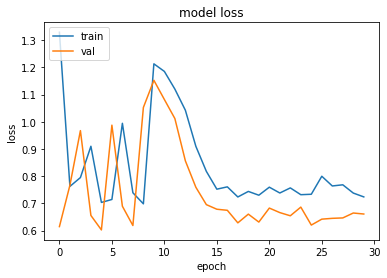

In [82]:
import matplotlib.pyplot as plt
plt.plot(history_bt5a.history['loss'])
plt.plot(history_bt5a.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [83]:
y_pred_bt5a = model_bt5a.predict(X_test_expanded)
y_pred_bt5a = np.argmax(y_pred_bt5a , axis = -1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_bt5a)*100

313/313 [==============================] - 1s 2ms/step


75.69

#### b)

In [89]:
from keras.datasets.cifar10 import load_data
(X_train, y_train), (X_test, y_test) = load_data()
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train,
test_size=0.1)

X_train_expanded = np.expand_dims(X_train, axis=3)
X_dev_expanded = np.expand_dims(X_dev, axis=3)
X_test_expanded = np.expand_dims(X_test, axis=3)

y_train_new = to_categorical(y_train, num_classes=10)
y_dev_new = to_categorical(y_dev, num_classes = 10)

In [90]:
model_bt5b = Sequential()
model_bt5b.add(Input(shape=(32, 32, 3)))
model_bt5b.add(Conv2D(32, padding="valid", kernel_size=(3, 3),
activation="relu"))
model_bt5b.add(MaxPooling2D(pool_size=(2, 2)))
model_bt5b.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model_bt5b.add(MaxPooling2D(pool_size=(2, 2)))
model_bt5b.add(Flatten())
model_bt5b.add(Dropout(0.5))
model_bt5b.add(Dense(10, activation="softmax"))
model_bt5b.summary()

optimizer = Adam(learning_rate = 0.01)
loss = CategoricalCrossentropy()
model_bt5b.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history_bt5b = model_bt5b.fit(X_train, y_train_new,
                    batch_size=128, epochs=30,
                  validation_data=(X_dev,y_dev_new))

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 2304)              0         
                                                                 
 dropout_3 (Dropout)         (None, 2304)            

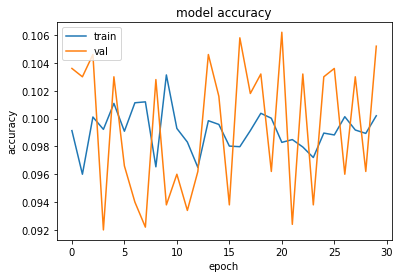

In [91]:
import matplotlib.pyplot as plt
plt.plot(history_bt5b.history['accuracy'])
plt.plot(history_bt5b.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

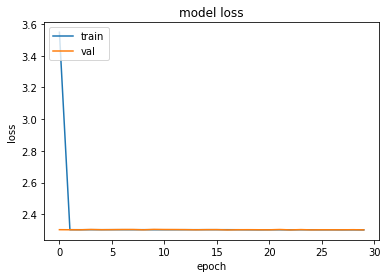

In [92]:
import matplotlib.pyplot as plt
plt.plot(history_bt5b.history['loss'])
plt.plot(history_bt5b.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [95]:
y_pred_bt5b = model_bt5b.predict(X_test)
y_pred_bt5b = np.argmax(y_pred_bt5b , axis = -1)
accuracy_score(y_test, y_pred_bt5b)*100

313/313 [==============================] - 1s 2ms/step


10.05

### Bài tập 6*

#### a)

In [96]:
from keras.datasets.fashion_mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train,
test_size=0.1)

X_train_expanded = np.expand_dims(X_train, axis=3)
X_dev_expanded = np.expand_dims(X_dev, axis=3)
X_test_expanded = np.expand_dims(X_test, axis=3)


y_train_new = to_categorical(y_train, num_classes=10)
y_dev_new = to_categorical(y_dev, num_classes = 10)

In [97]:
model_bt6a = Sequential()
model_bt6a.add(Input(shape = (28,28,1)))
model_bt6a.add(Conv2D(96,(7,7), strides = (2,2),name = 'conv1'))
model_bt6a.add(MaxPool2D(pool_size=(3, 3), strides=(2,2), padding='same', name='pool1'))
model_bt6a.add(BatchNormalization(axis=3, name='bn_conv1'))
model_bt6a.add(Conv2D(256, (5, 5), strides=(4, 4), name='conv2'))
model_bt6a.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='pool2'))
model_bt6a.add(BatchNormalization(axis=3, name='bn_conv2'))
model_bt6a.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', name='conv3'))
model_bt6a.add(Conv2D(1024, (3, 3), strides=(1, 1), padding='same', name='conv4'))
model_bt6a.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', name='conv5'))
model_bt6a.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='pool3'))
model_bt6a.add(Flatten())
model_bt6a.add(Dense(units=4096))
model_bt6a.add(Dense(units=4096))
model_bt6a.add(Dense(units=10, activation="softmax"))

print(model_bt6a.summary())

optimizer = Adam(learning_rate = 5e-4)
loss = CategoricalCrossentropy()
model_bt6a.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
callback = EarlyStopping(monitor= 'val_loss', patience=1)
history_bt6a = model_bt6a.fit(X_train_expanded, y_train_new,
                    batch_size=256, epochs=30,
                  validation_data=(X_dev_expanded,y_dev_new), callbacks= callback)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 11, 11, 96)        4800      
                                                                 
 pool1 (MaxPooling2D)        (None, 6, 6, 96)          0         
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 6, 6, 96)         384       
 n)                                                              
                                                                 
 conv2 (Conv2D)              (None, 1, 1, 256)         614656    
                                                                 
 pool2 (MaxPooling2D)        (None, 1, 1, 256)         0         
                                                                 
 bn_conv2 (BatchNormalizatio  (None, 1, 1, 256)        1024      
 n)                                                  

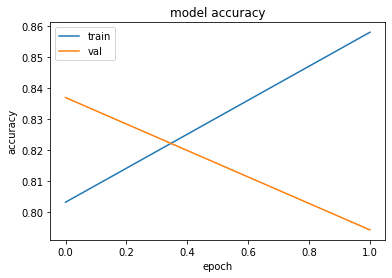

In [98]:
import matplotlib.pyplot as plt
plt.plot(history_bt6a.history['accuracy'])
plt.plot(history_bt6a.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

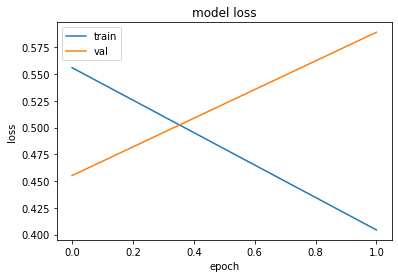

In [99]:
import matplotlib.pyplot as plt
plt.plot(history_bt6a.history['loss'])
plt.plot(history_bt6a.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [105]:
y_pred_bt6a = model_bt6a.predict(X_test_expanded)
y_pred_bt6a = np.argmax(y_pred_bt6a , axis = -1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_bt6a)*100

313/313 [==============================] - 2s 5ms/step


78.81

#### b)

In [100]:
from keras.datasets.fashion_mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train,
test_size=0.1)

X_train_expanded = np.expand_dims(X_train, axis=3)
X_dev_expanded = np.expand_dims(X_dev, axis=3)
X_test_expanded = np.expand_dims(X_test, axis=3)


y_train_new = to_categorical(y_train, num_classes=10)
y_dev_new = to_categorical(y_dev, num_classes = 10)

In [101]:
model_bt6b = Sequential()
model_bt6b.add(Input(shape = (28,28,1)))
model_bt6b.add(Conv2D(96,(7,7), strides = (2,2),name = 'conv1'))
model_bt6b.add(MaxPool2D(pool_size=(3, 3), strides=(2,2), padding='same', name='pool1'))
model_bt6b.add(BatchNormalization(axis=3, name='bn_conv1'))
model_bt6b.add(Conv2D(256, (5, 5), strides=(4, 4), name='conv2'))
model_bt6b.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='pool2'))
model_bt6b.add(BatchNormalization(axis=3, name='bn_conv2'))
model_bt6b.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', name='conv3'))
model_bt6b.add(Conv2D(1024, (3, 3), strides=(1, 1), padding='same', name='conv4'))
model_bt6b.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', name='conv5'))
model_bt6b.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='pool3'))
model_bt6b.add(Flatten())
model_bt6b.add(Dense(units=4096))
model_bt6b.add(Dense(units=4096))
model_bt6b.add(Dense(units=10, activation="softmax"))

print(model_bt6b.summary())

optimizer = Adam(learning_rate = 5e-4)
loss = CategoricalCrossentropy()
model_bt6b.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
callback = EarlyStopping(monitor= 'val_loss', patience=1)
history_bt6b = model_bt6b.fit(X_train_expanded, y_train_new,
                    batch_size=256, epochs=30,
                  validation_data=(X_dev_expanded,y_dev_new), callbacks= callback)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 11, 11, 96)        4800      
                                                                 
 pool1 (MaxPooling2D)        (None, 6, 6, 96)          0         
                                                                 
 bn_conv1 (BatchNormalizatio  (None, 6, 6, 96)         384       
 n)                                                              
                                                                 
 conv2 (Conv2D)              (None, 1, 1, 256)         614656    
                                                                 
 pool2 (MaxPooling2D)        (None, 1, 1, 256)         0         
                                                                 
 bn_conv2 (BatchNormalizatio  (None, 1, 1, 256)        1024      
 n)                                                  

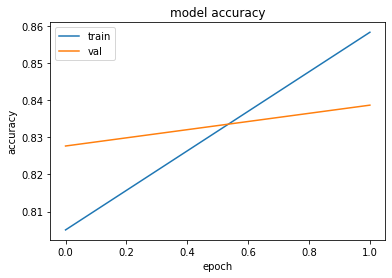

In [102]:
import matplotlib.pyplot as plt
plt.plot(history_bt6b.history['accuracy'])
plt.plot(history_bt6b.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

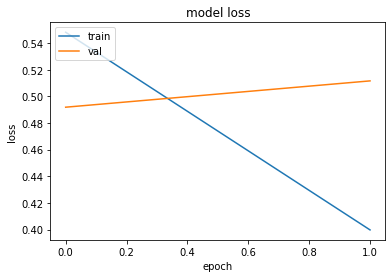

In [103]:
import matplotlib.pyplot as plt
plt.plot(history_bt6b.history['loss'])
plt.plot(history_bt6b.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [104]:
y_pred_bt6b = model_bt6b.predict(X_test)
y_pred_bt6b = np.argmax(y_pred_bt6b , axis = -1)
accuracy_score(y_test, y_pred_bt6b)*100

313/313 [==============================] - 2s 6ms/step


83.08